In [134]:
import (
	"fmt"
	"os"
	"time"

	"github.com/mrazza/gonav"
	"encoding/csv"
	"io"
	"strconv"
	"strings"
	"image"
	"image/draw"
	"image/jpeg"
	r2 "github.com/golang/geo/r2"
	metadata "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs/metadata"
    ex "github.com/markus-wa/demoinfocs-golang/v2/examples"
	demoinfocs "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs"
	events "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs/events"
    heatmap "github.com/dustin/go-heatmap"
    schemes "github.com/dustin/go-heatmap/schemes"
	"bytes"
    "reflect"
    "io/ioutil"
    "log"
    "os"
    "path/filepath"
    common "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs/common"
     "image/color"


)

In [2]:
func checkError(err error) {
	if err != nil {
		panic(err)
	}
}

In [129]:
schemes.PBJ == 2

ERROR: repl.go:1:16: invalid binary operation == between <[]image/color.Color> and Expr{Type: untyped.Lit, Value: {int 2}} <untyped.Lit>: schemes.PBJ == 2

In [135]:
func createImage(points[] r2.Point, mapname string, dotSize int, scheme []color.Color) *image.RGBA {
    if len(points) == 0 {
        return nil
    }
    r2Bounds := r2.RectFromPoints(points...)
    padding := float64(dotSize) / 2.0
    bounds := image.Rectangle{
         Min: image.Point{X: int(r2Bounds.X.Lo - padding), Y: int(r2Bounds.Y.Lo - padding)},
        Max: image.Point{X: int(r2Bounds.X.Hi + padding), Y: int(r2Bounds.Y.Hi + padding)},
    }
    
    var data []heatmap.DataPoint
    for _, p := range points[1:] {
        // Invert Y since go-heatmap expects data to be ordered from bottom to top
        data = append(data, heatmap.P(p.X, p.Y*-1))
    }
    fMap, err := os.Open(fmt.Sprintf("./csgo/data/map/%s.jpg", mapname))
    checkError(err)
    
    imgMap, _, err := image.Decode(fMap)
    checkError(err)
    
    img := image.NewRGBA(imgMap.Bounds())
    draw.Draw(img, imgMap.Bounds(), imgMap, image.Point{}, draw.Over)
    
    imgHeatmap := heatmap.Heatmap(image.Rect(0, 0, bounds.Dx(), bounds.Dy()), data, dotSize, 128, scheme)
    draw.Draw(img, bounds, imgHeatmap, image.Point{}, draw.Over)
    
    return img

}

In [4]:
func convertPathsToArraysOfPoints(arr[] string, name string) ([]r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, ) {
    var miragePoints []r2.Point
    var dustPoints []r2.Point
    var infernoPoints []r2.Point
    var nukePoints []r2.Point
    var overpassPoints []r2.Point
    var ancientPoints []r2.Point
    var vertigoPoints []r2.Point
    for i, x := range arr {
        file, err := os.Open(x)
        checkError(err)
        
        p := demoinfocs.NewParser(file)
        
        header, err := p.ParseHeader()
        checkError(err)
        
        mapMetadata := metadata.MapNameToMap[header.MapName]
        
        if(header.MapName == "de_dust2"){
            var points []r2.Point   
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                dustPoints = append(dustPoints, r2.Point{X: x, Y: y})
            }
            })           
        } else if (header.MapName == "de_mirage") { 
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                miragePoints = append(miragePoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_inferno") {  
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                infernoPoints = append(infernoPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_vertigo") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                vertigoPoints = append(vertigoPoints, r2.Point{X: x, Y: y})
            }
            })                
        }  else if (header.MapName == "de_ancient") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                ancientPoints = append(ancientPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_overpass") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                overpassPoints = append(overpassPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_nuke") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == 3) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                nukePoints = append(nukePoints, r2.Point{X: x, Y: y})
            }
            })                
        }
        
        err = p.ParseToEnd()
        checkError(err)    
    }
    return miragePoints, dustPoints, infernoPoints, vertigoPoints, ancientPoints, overpassPoints, nukePoints
}

In [5]:
func convertPathsToArraysOfPointsCT(arr[] string, name string, team common.Team) ([]r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, ) {
    var miragePoints []r2.Point
    var dustPoints []r2.Point
    var infernoPoints []r2.Point
    var nukePoints []r2.Point
    var overpassPoints []r2.Point
    var ancientPoints []r2.Point
    var vertigoPoints []r2.Point
    for i, x := range arr {
        file, err := os.Open(x)
        checkError(err)
        
        p := demoinfocs.NewParser(file)
        
        header, err := p.ParseHeader()
        checkError(err)
        
        mapMetadata := metadata.MapNameToMap[header.MapName]
        
        if(header.MapName == "de_dust2"){
            var points []r2.Point   
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                dustPoints = append(dustPoints, r2.Point{X: x, Y: y})
            }
            })           
        } else if (header.MapName == "de_mirage") { 
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                miragePoints = append(miragePoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_inferno") {  
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                infernoPoints = append(infernoPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_vertigo") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                vertigoPoints = append(vertigoPoints, r2.Point{X: x, Y: y})
            }
            })                
        }  else if (header.MapName == "de_ancient") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                ancientPoints = append(ancientPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_overpass") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                overpassPoints = append(overpassPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_nuke") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == name && e.Killer.Team == team) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                nukePoints = append(nukePoints, r2.Point{X: x, Y: y})
            }
            })                
        }
        
        err = p.ParseToEnd()
        checkError(err)    
    }
    return miragePoints, dustPoints, infernoPoints, vertigoPoints, ancientPoints, overpassPoints, nukePoints
}

In [6]:
func FilePathWalkDir(root string) ([]string, error) {
    var files []string
    err := filepath.Walk(root, func(path string, info os.FileInfo, err error) error {
        if !info.IsDir() {
            files = append(files, path)
        }
        return nil
    })
    return files, err
}

In [7]:
demos_path := "/mnt/d/ESL_COLOGNE"

In [8]:
files, err := FilePathWalkDir(demos_path)

In [9]:
strings.Split(strings.Split(strings.Split(files[1], "/")[4], "-")[5], "_")[0]

mirage

In [10]:
maps_to_demos := make(map[string][]string)

In [11]:
for _, f := range files {
    mapp := strings.Split(strings.Split(strings.Split(f, "/")[4], "-")[5], "_")[0]
    maps_to_demos[mapp] = append(maps_to_demos[mapp], f)
}

In [12]:
maps_to_demos

map[ancient:[/mnt/d/ESL_COLOGNE/natus-vincere-vs-astralis-m1-ancient_65722.dem] dust2:[/mnt/d/ESL_COLOGNE/g2-vs-natus-vincere-m1-dust2_65841.dem /mnt/d/ESL_COLOGNE/natus-vincere-vs-astralis-m2-dust2_65722.dem /mnt/d/ESL_COLOGNE/natus-vincere-vs-renegades-m2-dust2_65649.dem] inferno:[/mnt/d/ESL_COLOGNE/natus-vincere-vs-astralis-m3-inferno_65722.dem /mnt/d/ESL_COLOGNE/natus-vincere-vs-faze-m1-inferno_65822.dem /mnt/d/ESL_COLOGNE/natus-vincere-vs-renegades-m1-inferno_65649.dem] mirage:[/mnt/d/ESL_COLOGNE/g2-vs-natus-vincere-m2-mirage_65841.dem /mnt/d/ESL_COLOGNE/natus-vincere-vs-faze-m2-mirage_65822.dem /mnt/d/ESL_COLOGNE/vitality-vs-natus-vincere-m3-mirage_65695.dem] nuke:[/mnt/d/ESL_COLOGNE/g2-vs-natus-vincere-m3-nuke_65841.dem /mnt/d/ESL_COLOGNE/natus-vincere-vs-renegades-m3-nuke_65649.dem /mnt/d/ESL_COLOGNE/vitality-vs-natus-vincere-m2-nuke_65695.dem] overpass:[/mnt/d/ESL_COLOGNE/vitality-vs-natus-vincere-m1-overpass_65695.dem]]

In [87]:
ctmiragePoints, ctdustPoints, ctinfernoPoints, ctvertigoPoints, ctancientPoints, ctoverpassPoints, ctnukePoints := convertPathsToArraysOfPoints(files, "s1mple")
tmiragePoints, tdustPoints, tinfernoPoints, tvertigoPoints, tancientPoints, toverpassPoints, tnukePoints := convertPathsToArraysOfPointsCT(files, "s1mple", common.TeamTerrorists)

In [146]:
ctmirageImg := createImage(ctmiragePoints, "de_mirage", 40, schemes.Classic)
ctdustImg := createImage(ctdustPoints, "de_dust2", 40, schemes.Classic)
ctinfernoImg := createImage(ctinfernoPoints, "de_inferno", 40, schemes.Classic)
ctvertigoImg := createImage(ctvertigoPoints, "de_vertigo", 40, schemes.Classic)
ctoverpassImg := createImage(ctoverpassPoints, "de_overpass", 40, schemes.Classic)
ctnukeImg := createImage(ctnukePoints, "de_nuke", 40, schemes.Classic)
ctancientImg := createImage(ctancientPoints, "de_ancient", 40, schemes.Classic)

In [173]:
tmirageImg := createImage(tmiragePoints, "de_mirage", 20, schemes.OMG)
tdustImg := createImage(tdustPoints, "de_dust2", 20, schemes.OMG)
tinfernoImg := createImage(tinfernoPoints, "de_inferno", 20, schemes.OMG)
tvertigoImg := createImage(tvertigoPoints, "de_vertigo", 20, schemes.OMG)
toverpassImg := createImage(toverpassPoints, "de_overpass", 20, schemes.OMG)
tnukeImg := createImage(tnukePoints, "de_nuke", 20, schemes.OMG)
tancientImg := createImage(tancientPoints, "de_ancient", 20, schemes.OMG)

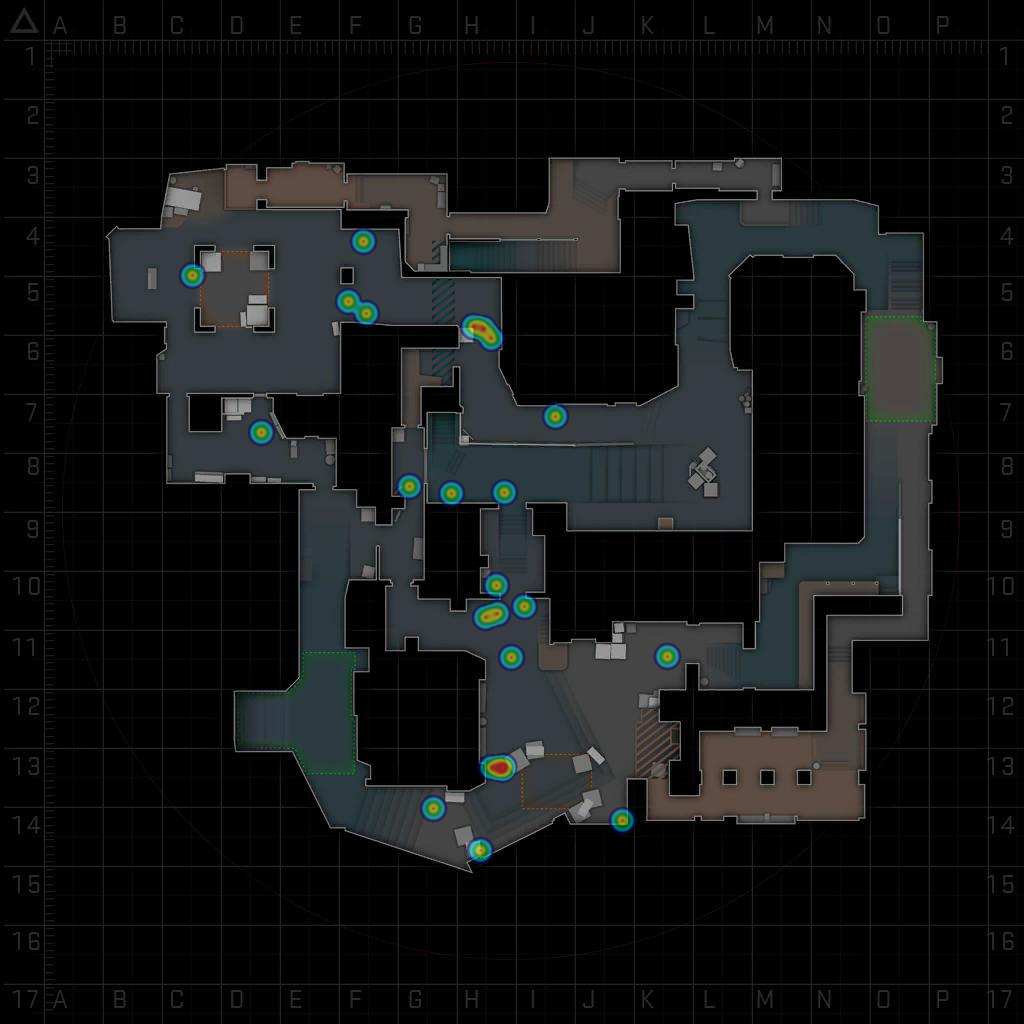

In [174]:
if(ctmirageImg == nil){
   os.Exit(1)
}
ctmirageImg

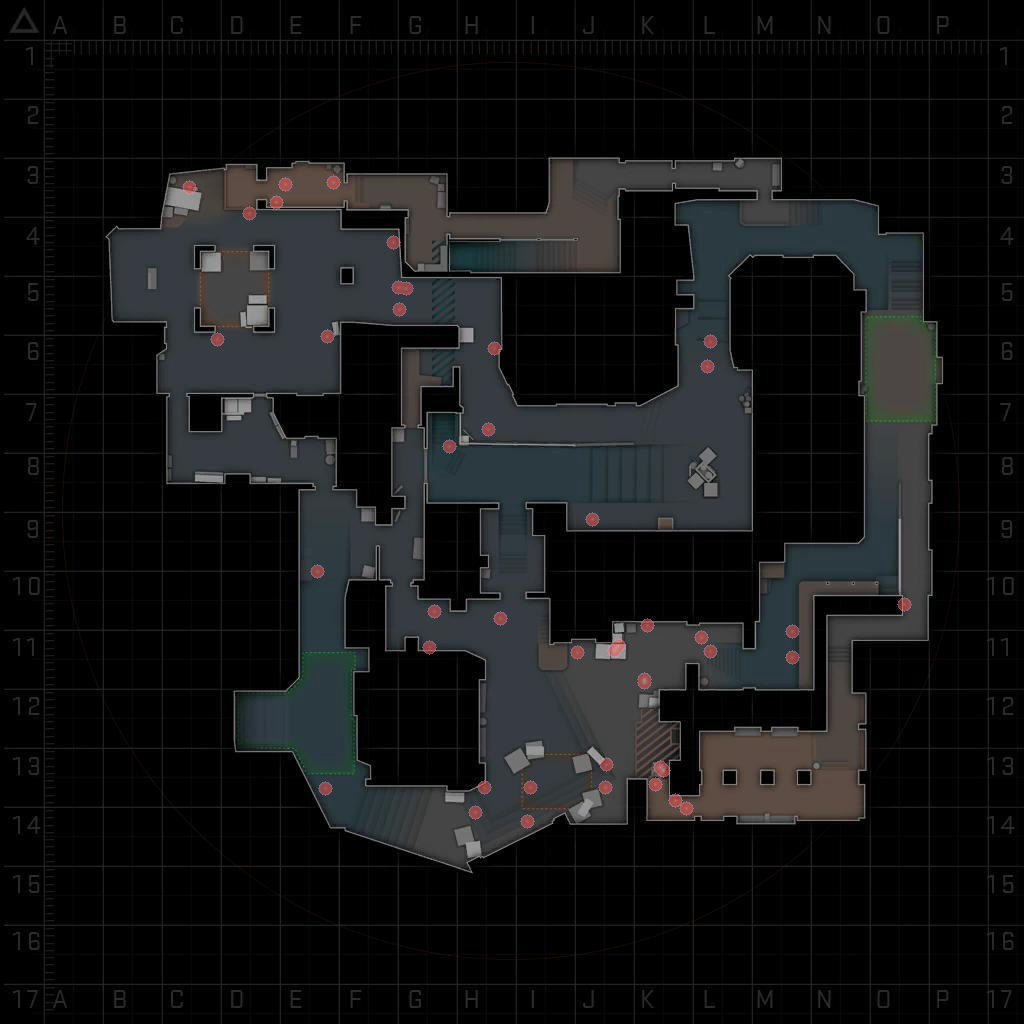

In [175]:
if(tmirageImg == nil){
   os.Exit(1)
}
tmirageImg

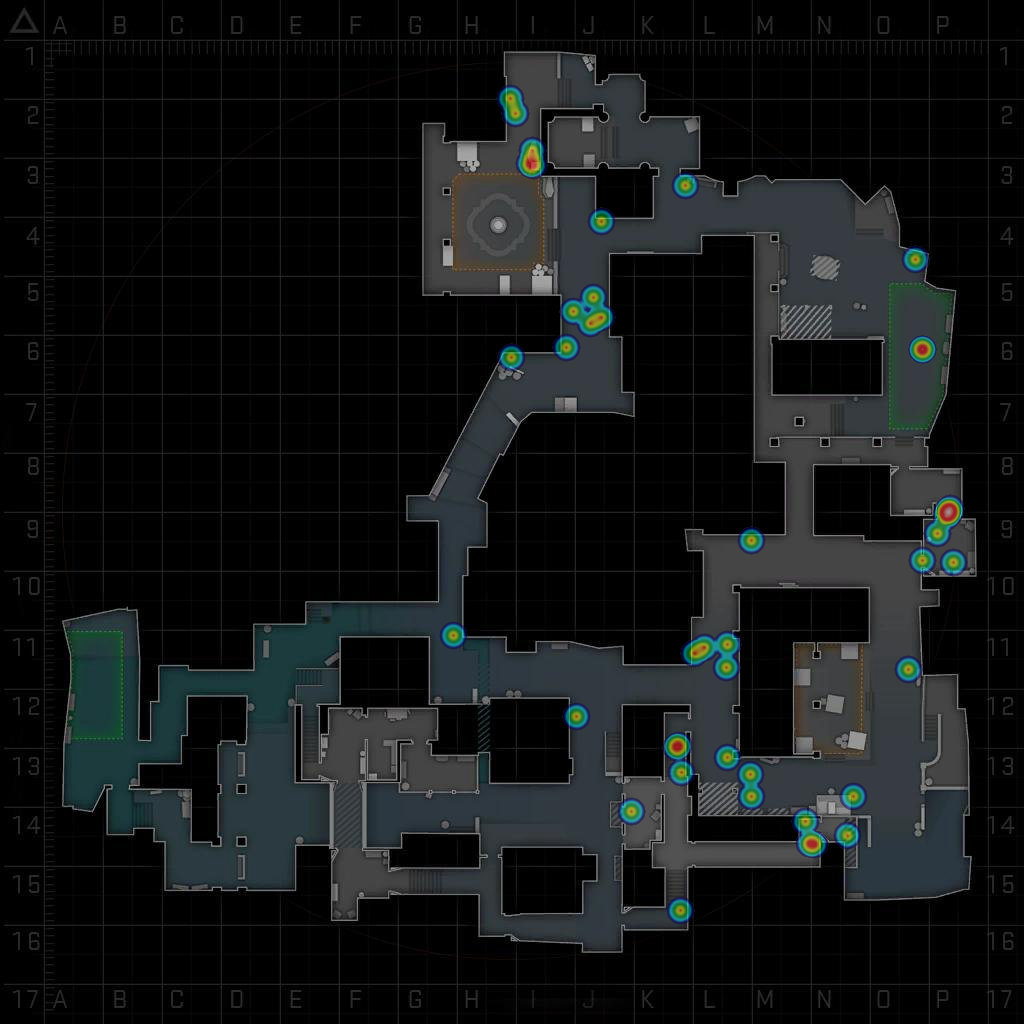

In [176]:
if(ctinfernoImg == nil){
    os.Exit(1)
}
ctinfernoImg

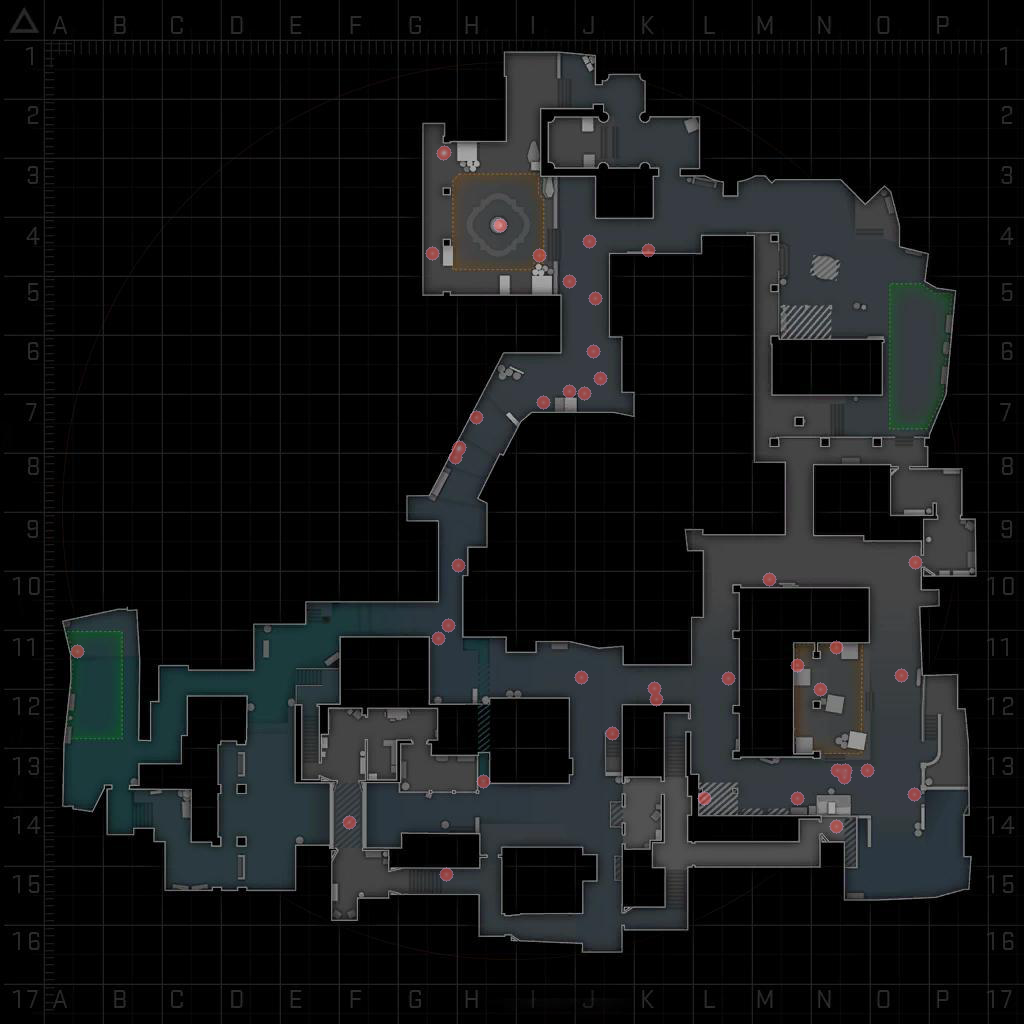

In [177]:
if(tinfernoImg == nil){
    os.Exit(1)
}
tinfernoImg

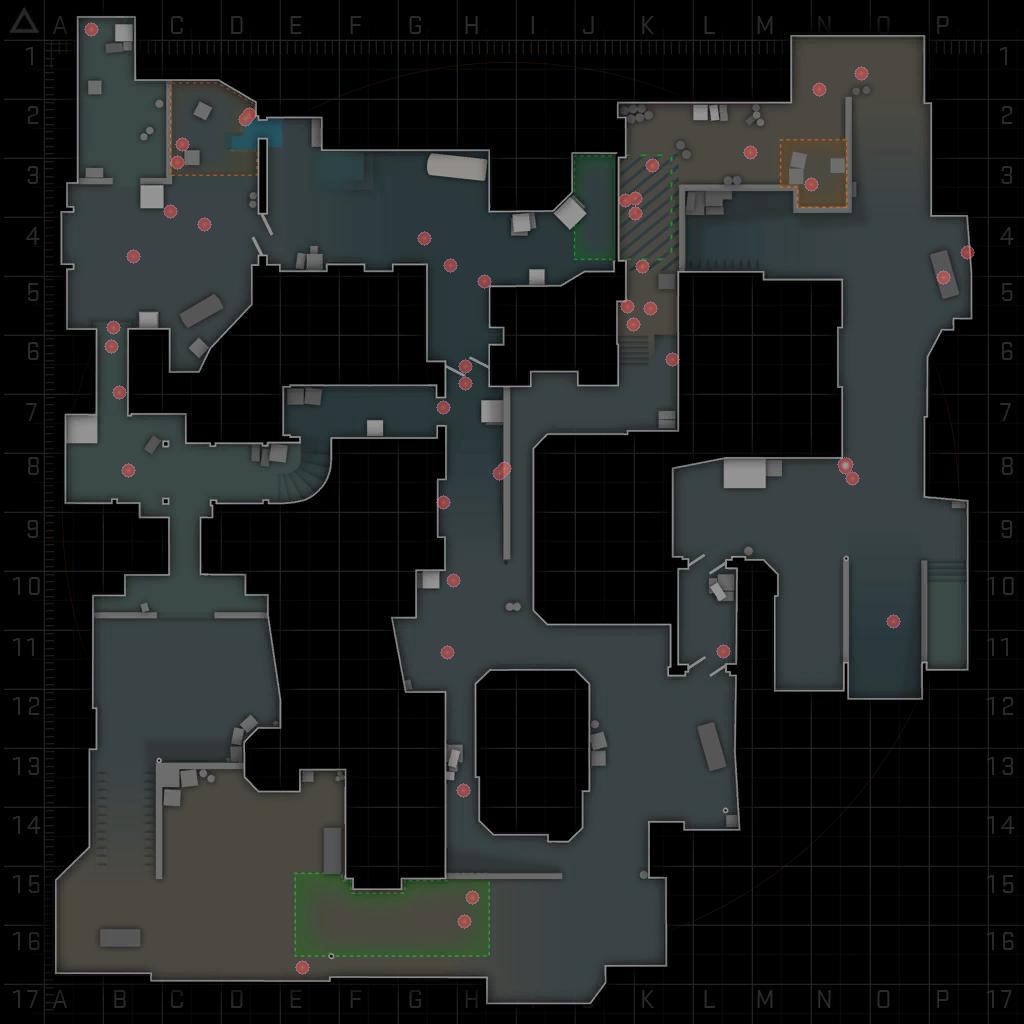

In [178]:
if(tdustImg == nil){
    os.Exit(1)
}
tdustImg

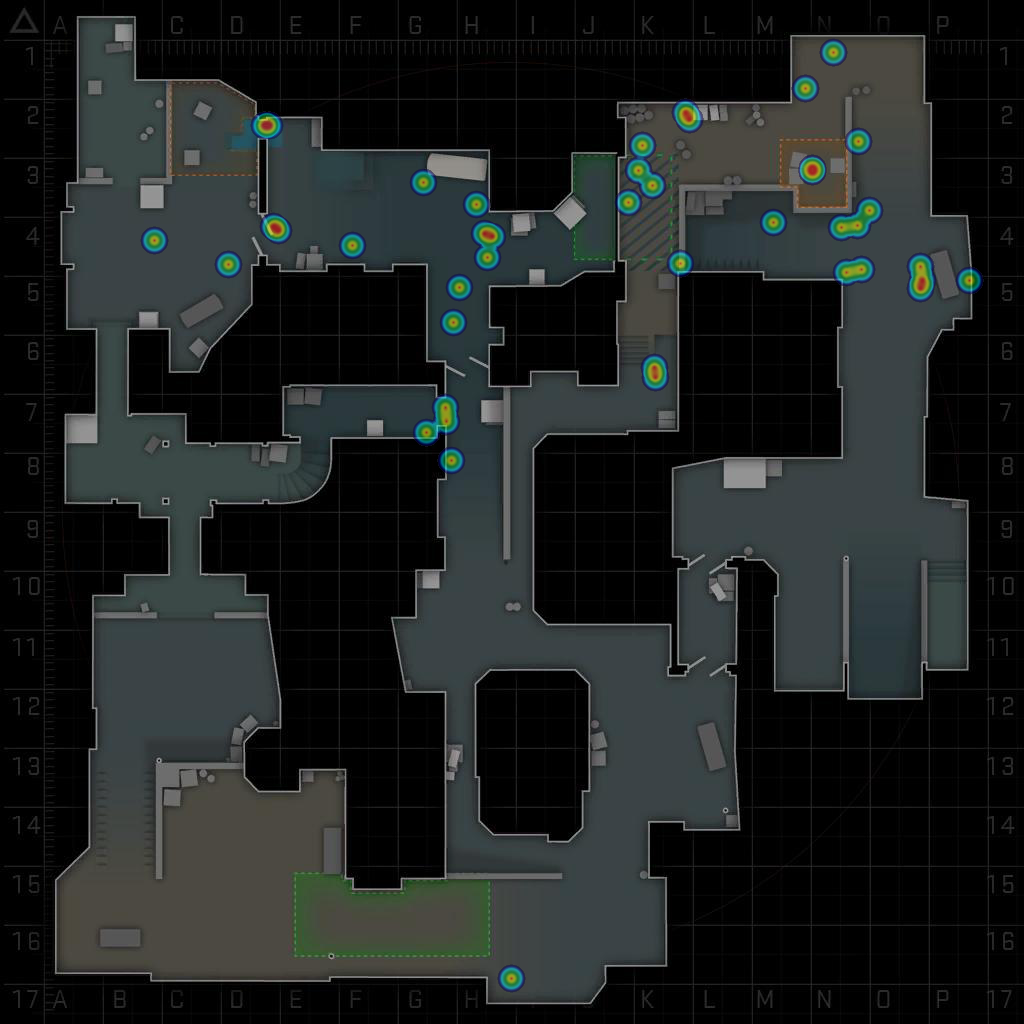

In [179]:
if(ctdustImg == nil){
    os.Exit(1)
}
ctdustImg

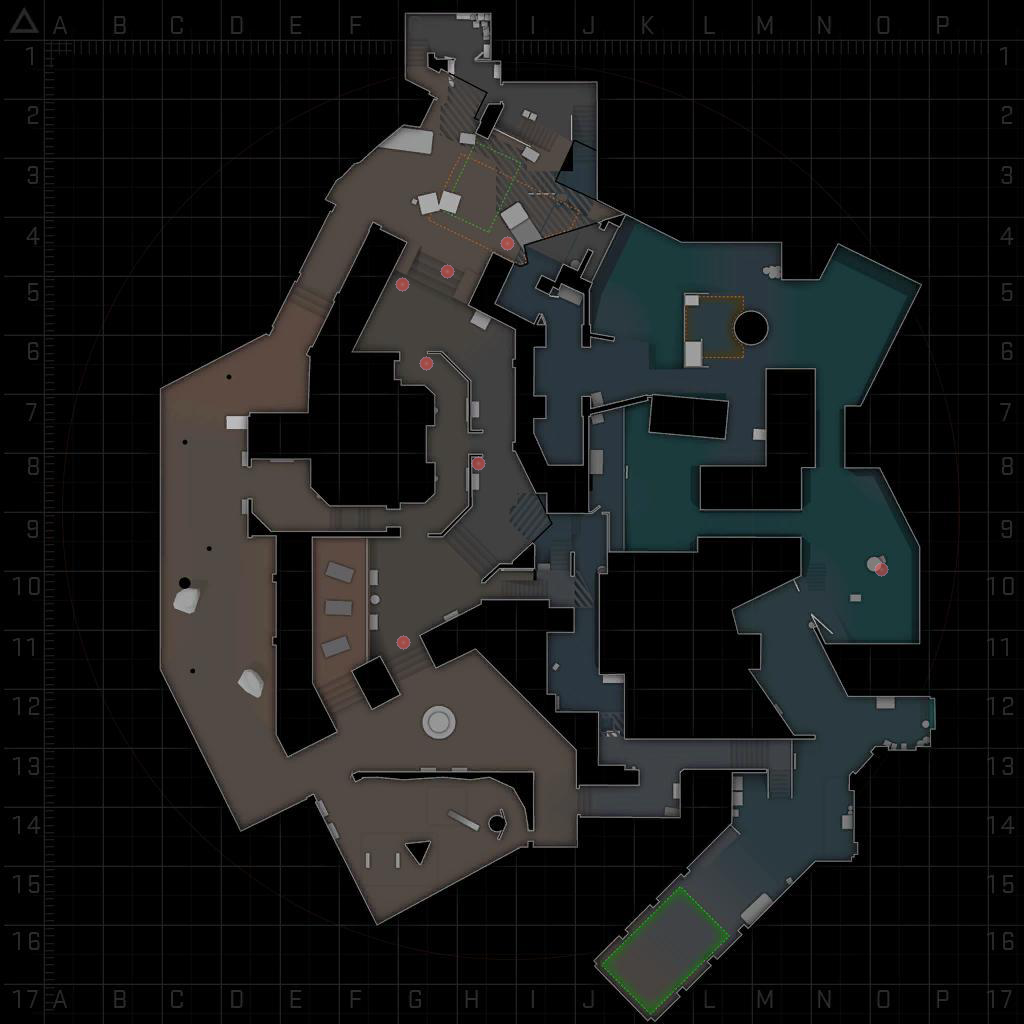

In [180]:
if(toverpassImg == nil){
    os.Exit(1)
}
toverpassImg

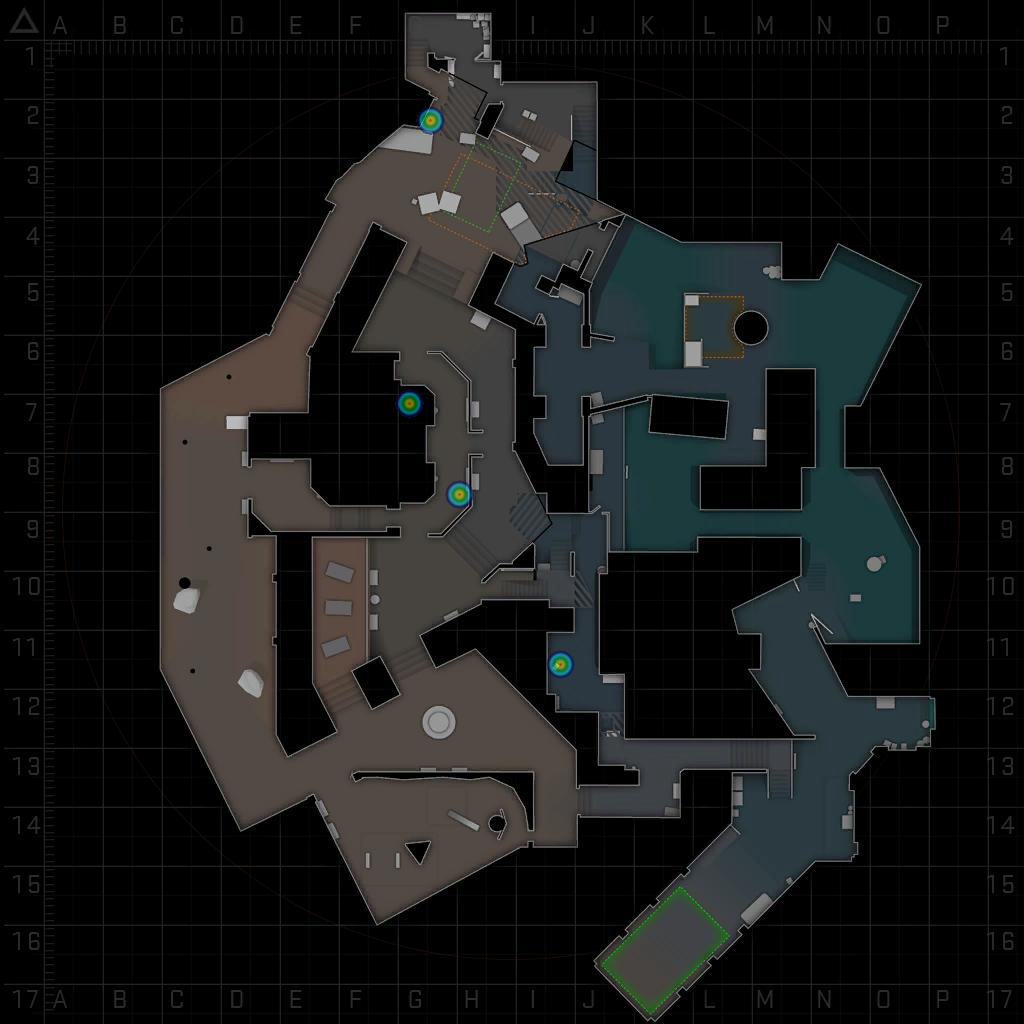

In [181]:
if(ctoverpassImg == nil){
    os.Exit(1)
}
ctoverpassImg

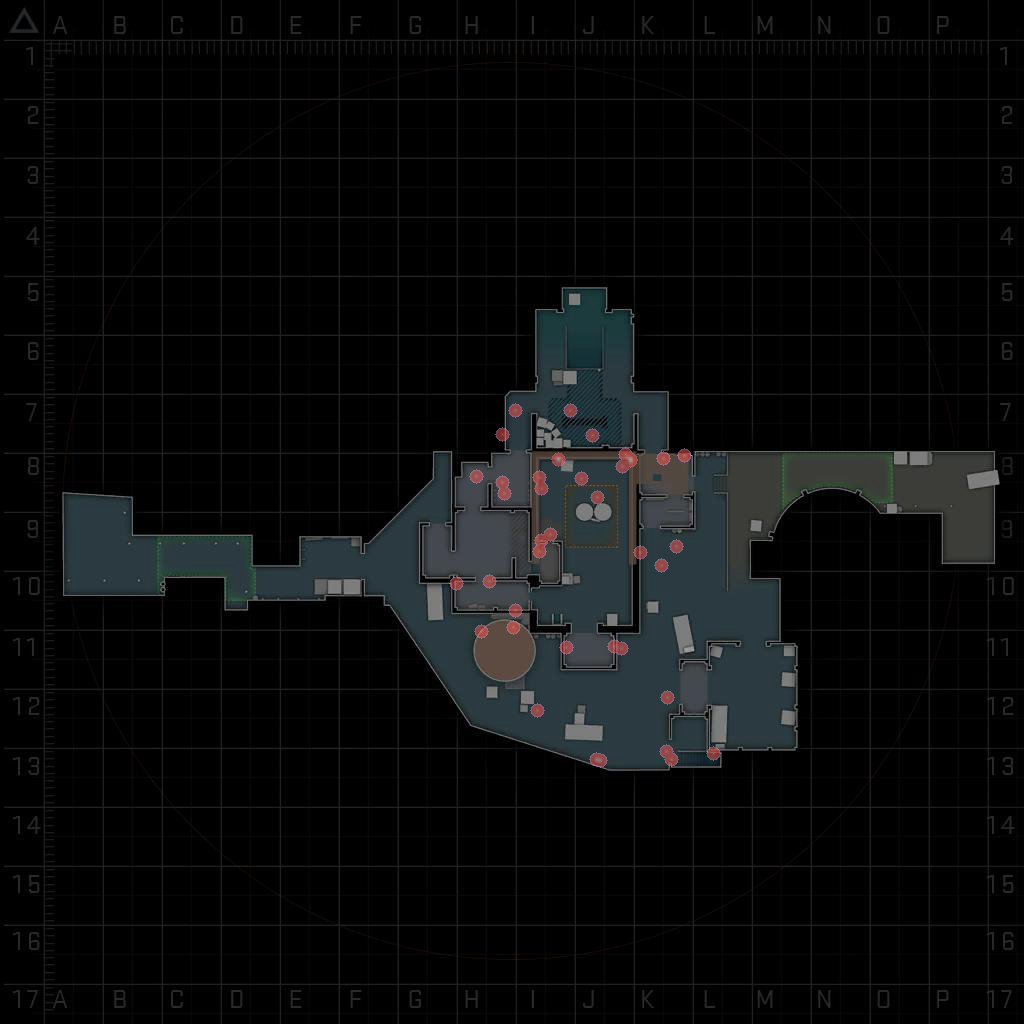

In [182]:
if(tnukeImg == nil){
    os.Exit(1)
}
tnukeImg

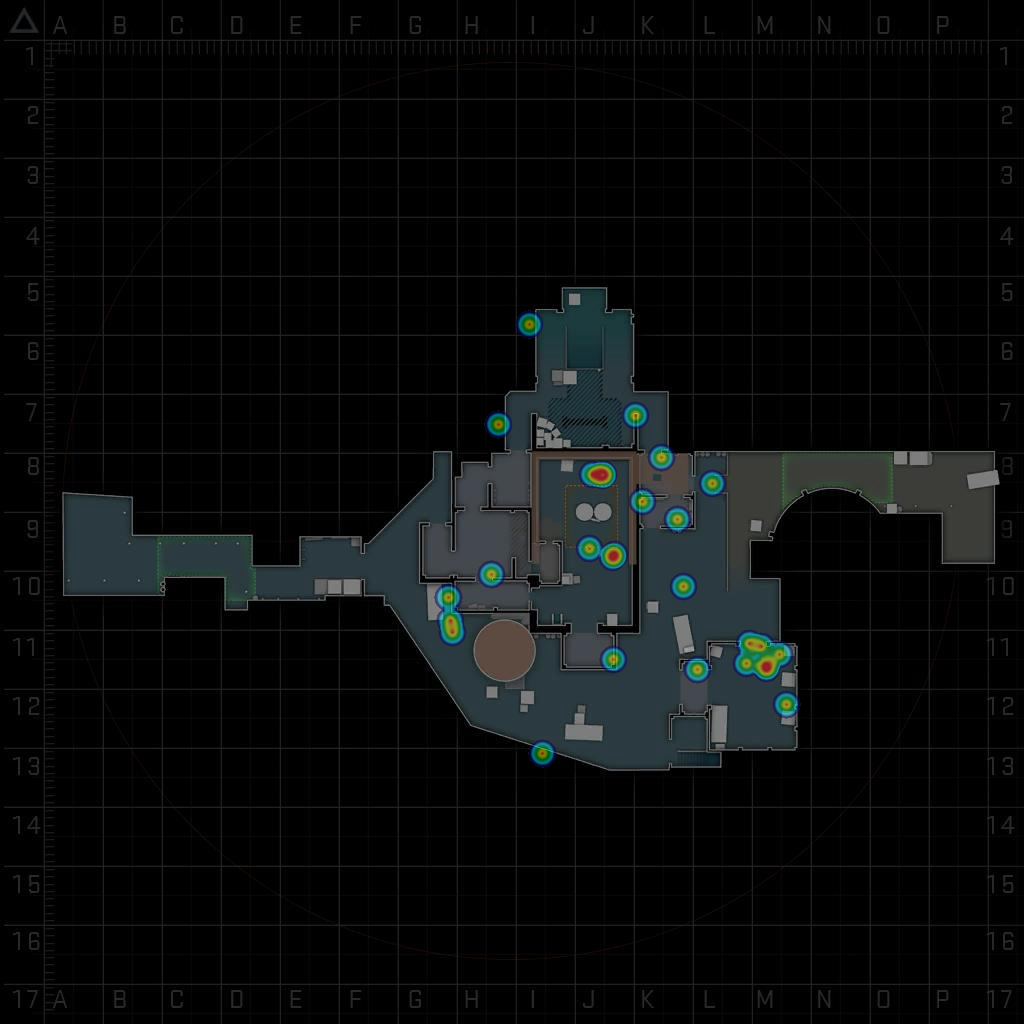

In [183]:
if(ctnukeImg == nil){
    os.Exit(1)
}
ctnukeImg

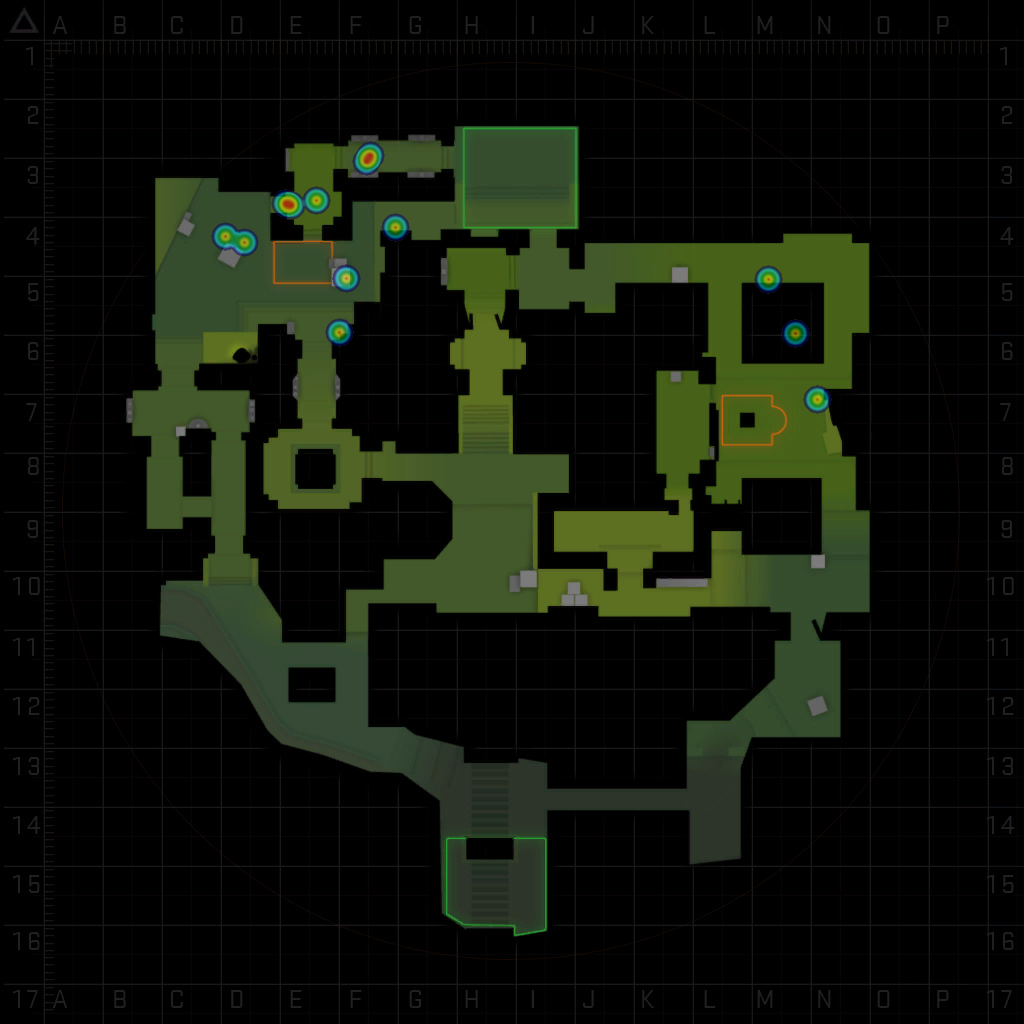

In [184]:
if(ctancientImg == nil){
    os.Exit(1)
}
ctancientImg

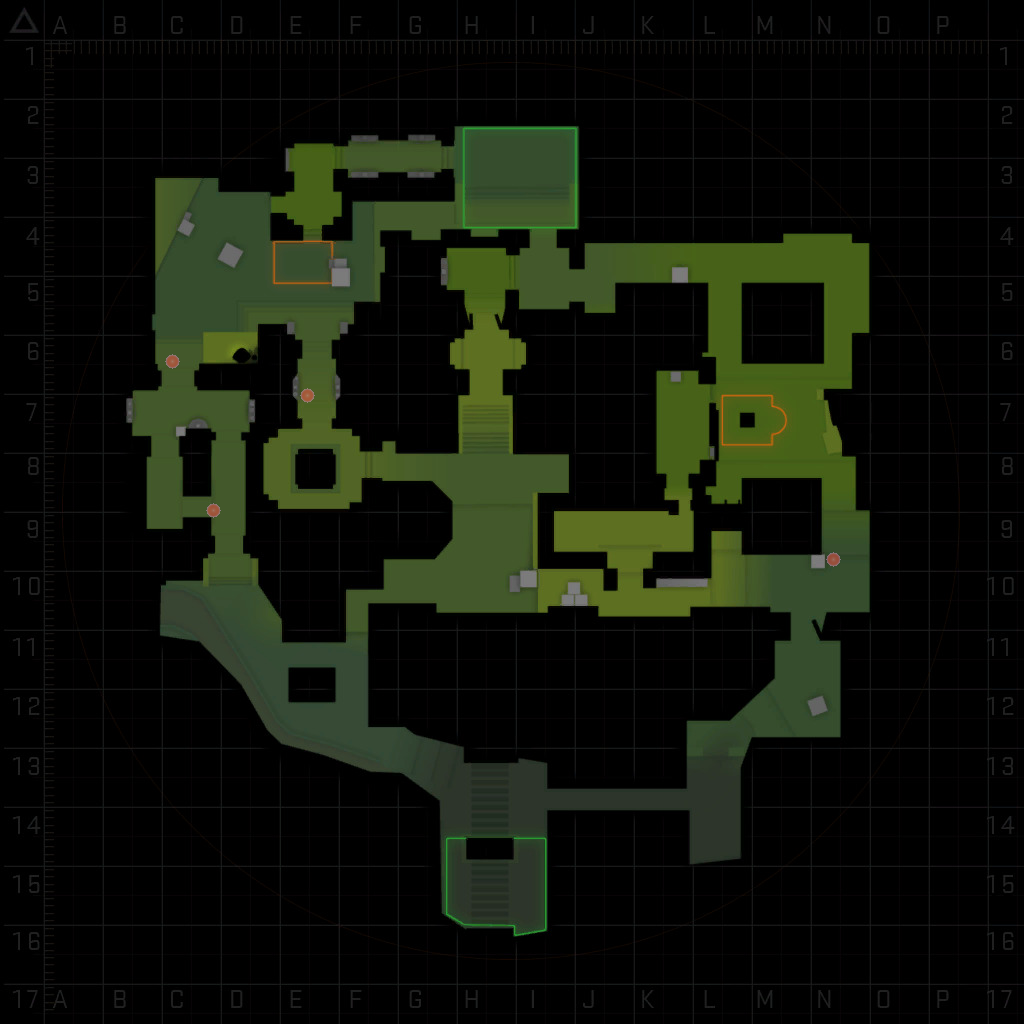

In [185]:
if(tancientImg == nil){
    os.Exit(1)
}
tancientImg

In [159]:
common.TeamTerrorists

2